### K-means algorithm
1. 임의의 중심값  μk  를 고른다. (보통 데이터 샘플 중의 하나를 선택)
2. 중심에서 각 샘플 데이터까지의 거리를 계산
3. 각 데이터 샘플에서 가장 가까운 중심을 선택하여 클러스터 갱신
4. 다시 만들어진 클러스터에 대해 중심을 다시 계산하고 1 ~ 4를 반복한다.

In [1]:
%matplotlib inline

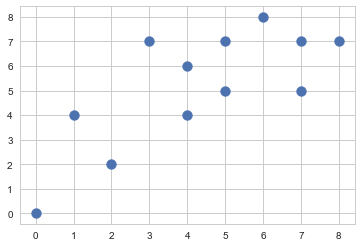

In [2]:
x = np.array([[7, 5], [5, 7], [7, 7], [4, 4], [4, 6], [1, 4],
              [0, 0], [2, 2], [8, 7], [6, 8], [5, 5], [3, 7]])
plt.scatter(x[:,0], x[:,1], c='b', s=100)
plt.show()

In [3]:
from sklearn.cluster import KMeans

#### 1회차

In [4]:
model1 = KMeans(n_clusters=2, init="random", n_init=1,
               max_iter=1, random_state=1).fit(x)

In [5]:
c0, c1 = model1.cluster_centers_
c0, c1

(array([ 6.6,  6.8]), array([ 2.71428571,  4.        ]))

In [6]:
model1.score(x)

-63.004081632653012

In [7]:
model1.labels_

array([0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1])

In [8]:
def plot_cluster(model, c0, c1):
    plt.scatter(x[model.labels_ == 0, 0], x[model.labels_ == 0, 1], marker='v', c='r')
    plt.scatter(x[model.labels_ == 1, 0], x[model.labels_ == 1, 1], marker='^', c='b')
    
    plt.scatter(c0[0], c0[1], s=200, marker='o', c='r')
    plt.scatter(c1[0], c1[1], s=200, marker='o', c='b')
    plt.show()

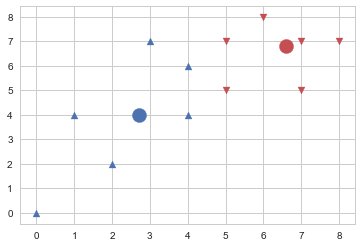

In [9]:
plot_cluster(model1, c0, c1)

In [10]:
def kmeans_df(model, c0, c1):
    df = pd.DataFrame(np.hstack([x, np.linalg.norm(x-c0, axis=1)[:,np.newaxis],
                                np.linalg.norm(x-c1, axis=1)[:,np.newaxis],
                                model.labels_[:,np.newaxis]]),
                     columns=['x0', 'x1', 'distance from c0', 'distance form c1', 'cluster'])
    return df

In [11]:
kmeans_df(model1, c0, c1)

,x0,x1,distance from c0,distance form c1,cluster
0,7.0,5.0,1.843909,4.400835,0.0
1,5.0,7.0,1.612452,3.771537,0.0
2,7.0,7.0,0.447214,5.231381,0.0
3,4.0,4.0,3.820995,1.285714,1.0
4,4.0,6.0,2.720294,2.377617,1.0
5,1.0,4.0,6.260990,1.714286,1.0
6,0.0,0.0,9.476286,4.833978,1.0
7,2.0,2.0,6.648308,2.123724,1.0
8,8.0,7.0,1.414214,6.077728,0.0
9,6.0,8.0,1.341641,5.176477,0.0


In [12]:
def calc_new_centroid(model):
    c0_new = [x[model.labels_ == 0, 0].mean(), x[model.labels_ == 0, 1].mean()]
    c1_new = [x[model.labels_ == 1, 0].mean(), x[model.labels_ == 1, 1].mean()]
    
    return c0_new, c1_new

In [13]:
calc_new_centroid(model1)

([6.333333333333333, 6.5], [2.3333333333333335, 3.8333333333333335])

#### 2회차

In [14]:
model2 = KMeans(n_clusters=2, init="random", n_init=1, max_iter=2, random_state=1).fit(x)

In [15]:
c0, c1 = model2.cluster_centers_
c0, c1

(array([ 6.33333333,  6.5       ]), array([ 2.33333333,  3.83333333]))

In [16]:
model2.score(x)

-59.222222222222157

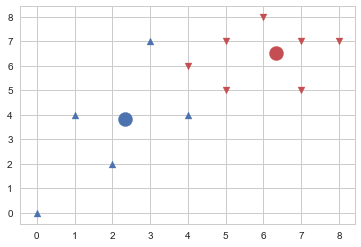

In [17]:
plot_cluster(model2, c0, c1)

In [18]:
kmeans_df(model2, c0, c1)

,x0,x1,distance from c0,distance form c1,cluster
0,7.0,5.0,1.641476,4.810290,0.0
1,5.0,7.0,1.424001,4.139914,0.0
2,7.0,7.0,0.833333,5.639641,0.0
3,4.0,4.0,3.419714,1.674979,1.0
4,4.0,6.0,2.386304,2.733537,0.0
5,1.0,4.0,5.890199,1.343710,1.0
6,0.0,0.0,9.075302,4.487637,1.0
7,2.0,2.0,6.247222,1.863390,1.0
8,8.0,7.0,1.740051,6.491447,0.0
9,6.0,8.0,1.536591,5.550275,0.0


In [19]:
calc_new_centroid(model2)

([6.0, 6.4285714285714288], [2.0, 3.3999999999999999])

#### 3회차

In [20]:
model3 = KMeans(n_clusters=2, init='random', n_init=1, max_iter=3, random_state=1).fit(x)

In [21]:
c0, c1 = model3.cluster_centers_
c0, c1

(array([ 6.        ,  6.42857143]), array([ 2. ,  3.4]))

In [22]:
model3.score(x)

-52.280816326530697

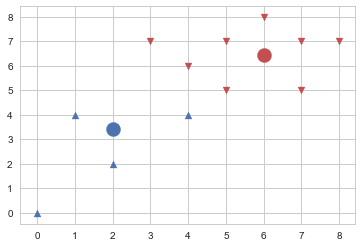

In [23]:
plot_cluster(model3, c0, c1)

In [24]:
kmeans_df(model3, c0, c1)

,x0,x1,distance from c0,distance form c1,cluster
0,7.0,5.0,1.743794,5.249762,0.0
1,5.0,7.0,1.151751,4.686150,0.0
2,7.0,7.0,1.151751,6.161169,0.0
3,4.0,4.0,3.146102,2.088061,1.0
4,4.0,6.0,2.045403,3.280244,0.0
5,1.0,4.0,5.558593,1.166190,1.0
6,0.0,0.0,8.793551,3.944617,1.0
7,2.0,2.0,5.967600,1.400000,1.0
8,8.0,7.0,2.080031,6.997142,0.0
9,6.0,8.0,1.571429,6.095900,0.0


In [25]:
calc_new_centroid(model3)

([5.625, 6.5], [1.75, 2.5])

### K-means ++

In [26]:
from mpl_toolkits.mplot3d import Axes3D
from sklearn.cluster import KMeans
from sklearn.datasets import load_iris

In [27]:
np.random.seed(5)
centers = [[1,1],[-1,-1],[1,-1]]

iris = load_iris()
x = iris.data
y = iris.target

In [45]:
def plot_iris_cluster(model):
    fig = plt.figure()
    ax = Axes3D(fig=fig, rect=[0, 0, .95, 1], elev=48, azim=134)
    model.fit(x)
    labels = model.labels_
    
    ax.scatter(x[:,3], x[:,0],x[:,2], c=labels, s=100, cmap=mpl.cm.jet)
    ax.w_xaxis.set_ticklabels([])
    ax.w_yaxis.set_ticklabels([])
    ax.w_zaxis.set_ticklabels([])
    
    ax.set_xlabel('petal_width')
    ax.set_ylabel('sepal_length')
    ax.set_zlabel('petal_length')
    
    plt.show()

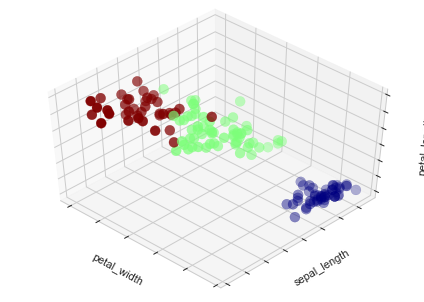

In [47]:
model_iris1 = KMeans(n_clusters=3)
plot_iris_cluster(model_iris1)

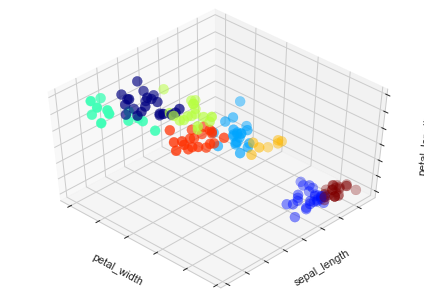

In [48]:
model_iris2 = KMeans(n_clusters=8)
plot_iris_cluster(model_iris2)

### digit 예제